<h1 align="center"><font size="5">Decision Tree used to Classify UFC Fighters </font></h1>

In this notebook, the classification of UFC fighters into three specific Types (Striker, Grappler and MMA) through use of a Decision Tree algorithm is implemented and evaluated.

Xlrd is installed to deal with excel files and pydotplus and python-graphviz to plot the Decision Tree Model.

In [3]:
!pip install xlrd
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: / 
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.

Solving environment: \ 
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.



The next step is to load the required libraries.

In [2]:
from sklearn.externals.six import StringIO #imports all python packages for plotting a decision tree
import pydotplus #Provides a Python interface to Graphviz Dot language
import matplotlib.image as mpimg #Provides an image module to support image loading rescaling and display operations.
from sklearn import tree #imports software for plotting decision trees
from sklearn.tree import DecisionTreeClassifier #imports Decision Tree Classifier model
from sklearn import preprocessing #imports preprocessing library
import numpy as np #imports numpy libary to allow access to large multi, dimensional arrays and matrices along with a series of high-level mathematical functions
from sklearn import metrics #imports metrics library
import pandas as pd #imports pandas libaray for working with structured data sets
from sklearn.model_selection import train_test_split #import train test split method
import matplotlib.pyplot as plt #import matplotlib library to provide visualisation of data
import seaborn as sns #import seaborn library to 

/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### The dataset

This dataset is about UFC fighters. The ufc_fighters_2.csv dataset includes features of 147 fighters who fit into one of three different Types.

In [4]:
df=pd.read_csv('ufc_fighters_2.csv')
df

,Fighters Name,Weight (lbs),Height (cm),Reach (cm),SLpM,Str.Acc,SApM,Str.Def,Td.Avg,Td.Acc,...,L.KO,KD.Ratio,Str.Stand,Str.Clinch,Str.Ground,Str.Head,Str.Body,Str.Leg,Avg.Fight Time,Type
0,Alistair Overeem,265,193,203.0,3.65,0.73,4.69,0.60,0.60,0.25,...,0.78,0.90,0.50,0.23,0.27,0.50,0.35,0.15,08:47:00,Striker
1,Isreal Adesanya,185,193,203.0,4.47,0.54,2.07,0.69,0.00,0.00,...,0.00,0.88,0.84,0.13,0.03,0.53,0.19,0.28,13:42:00,Striker
2,Khabib Nurmagomedov,155,177,177.0,4.29,0.50,1.70,0.67,5.09,0.45,...,0.00,0.20,0.40,0.04,0.56,0.87,0.08,0.05,13:56:00,Grappler
3,Daniel Cormier,235,180,182.0,3.83,0.52,3.66,0.58,1.93,0.47,...,0.50,0.18,0.50,0.28,0.22,0.72,0.16,0.12,12:34:00,Grappler
4,Jon Jones,205,193,213.0,4.30,0.58,2.22,0.64,1.85,0.44,...,0.00,0.22,0.65,0.17,0.18,0.47,0.25,0.29,15:28:00,MMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Jan Blachowicz,205,188,198.0,3.45,0.49,2.77,0.54,1.16,0.52,...,0.24,0.45,0.71,0.15,0.14,0.66,0.22,0.12,12:01:00,MMA
143,Curtis Blaydes,265,193,203.0,3.71,0.51,2.03,0.55,6.79,0.57,...,1.00,0.17,0.36,0.17,0.47,0.70,0.14,0.16,09:49:00,Grappler
144,Kyle Bochniak,145,170,178.0,2.60,0.32,4.73,0.59,1.17,0.19,...,0.00,0.17,0.90,0.08,0.02,0.66,0.13,0.21,15:00:00,MMA
145,Tim Boetsch,185,183,188.0,2.93,0.51,2.90,0.57,1.45,0.34,...,0.31,0.48,0.63,0.25,0.12,0.57,0.25,0.17,09:02:00,MMA


Data Analysis required that all variables be of float type so string type variables needed to be converted or removed.

In [5]:
df=df.drop('Fighters Name', axis=1) #Fighters name variable is removed
df=df.drop('Avg.Fight Time', axis=1)
#Convert the time variable to a float type.
'''time = pd.DatetimeIndex(df['Avg.Fight Time'])
time.hour+time.minute/60
df = df.drop('Avg.Fight Time', axis=1)
df["Avg.Fight Time"]=list(time.hour+time.minute/60)
Type=df.pop('Type')
df['Type']=Type'''

#Convert the Types to a float type.
types={'Grappler':0,'MMA':1,'Striker':2}
test=df.copy()
test['Type']=[types[i] for i in test['Type']]
test

,Weight (lbs),Height (cm),Reach (cm),SLpM,Str.Acc,SApM,Str.Def,Td.Avg,Td.Acc,Td.Def,...,L.Dec,L.KO,KD.Ratio,Str.Stand,Str.Clinch,Str.Ground,Str.Head,Str.Body,Str.Leg,Type
0,265,193,203.0,3.65,0.73,4.69,0.60,0.60,0.25,0.73,...,0.17,0.78,0.90,0.50,0.23,0.27,0.50,0.35,0.15,2
1,185,193,203.0,4.47,0.54,2.07,0.69,0.00,0.00,0.85,...,0.00,0.00,0.88,0.84,0.13,0.03,0.53,0.19,0.28,2
2,155,177,177.0,4.29,0.50,1.70,0.67,5.09,0.45,0.85,...,0.00,0.00,0.20,0.40,0.04,0.56,0.87,0.08,0.05,0
3,235,180,182.0,3.83,0.52,3.66,0.58,1.93,0.47,0.78,...,0.50,0.50,0.18,0.50,0.28,0.22,0.72,0.16,0.12,0
4,205,193,213.0,4.30,0.58,2.22,0.64,1.85,0.44,0.95,...,1.00,0.00,0.22,0.65,0.17,0.18,0.47,0.25,0.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,205,188,198.0,3.45,0.49,2.77,0.54,1.16,0.52,0.66,...,0.63,0.24,0.45,0.71,0.15,0.14,0.66,0.22,0.12,1
143,265,193,203.0,3.71,0.51,2.03,0.55,6.79,0.57,0.25,...,0.00,1.00,0.17,0.36,0.17,0.47,0.70,0.14,0.16,0
144,145,170,178.0,2.60,0.32,4.73,0.59,1.17,0.19,0.63,...,1.00,0.00,0.17,0.90,0.08,0.02,0.66,0.13,0.21,1
145,185,183,188.0,2.93,0.51,2.90,0.57,1.45,0.34,0.59,...,0.31,0.31,0.48,0.63,0.25,0.12,0.57,0.25,0.17,1


### Feature Selection

The corr() function from the pandas library is used to highlight how strongly each variable is correlated to one another.

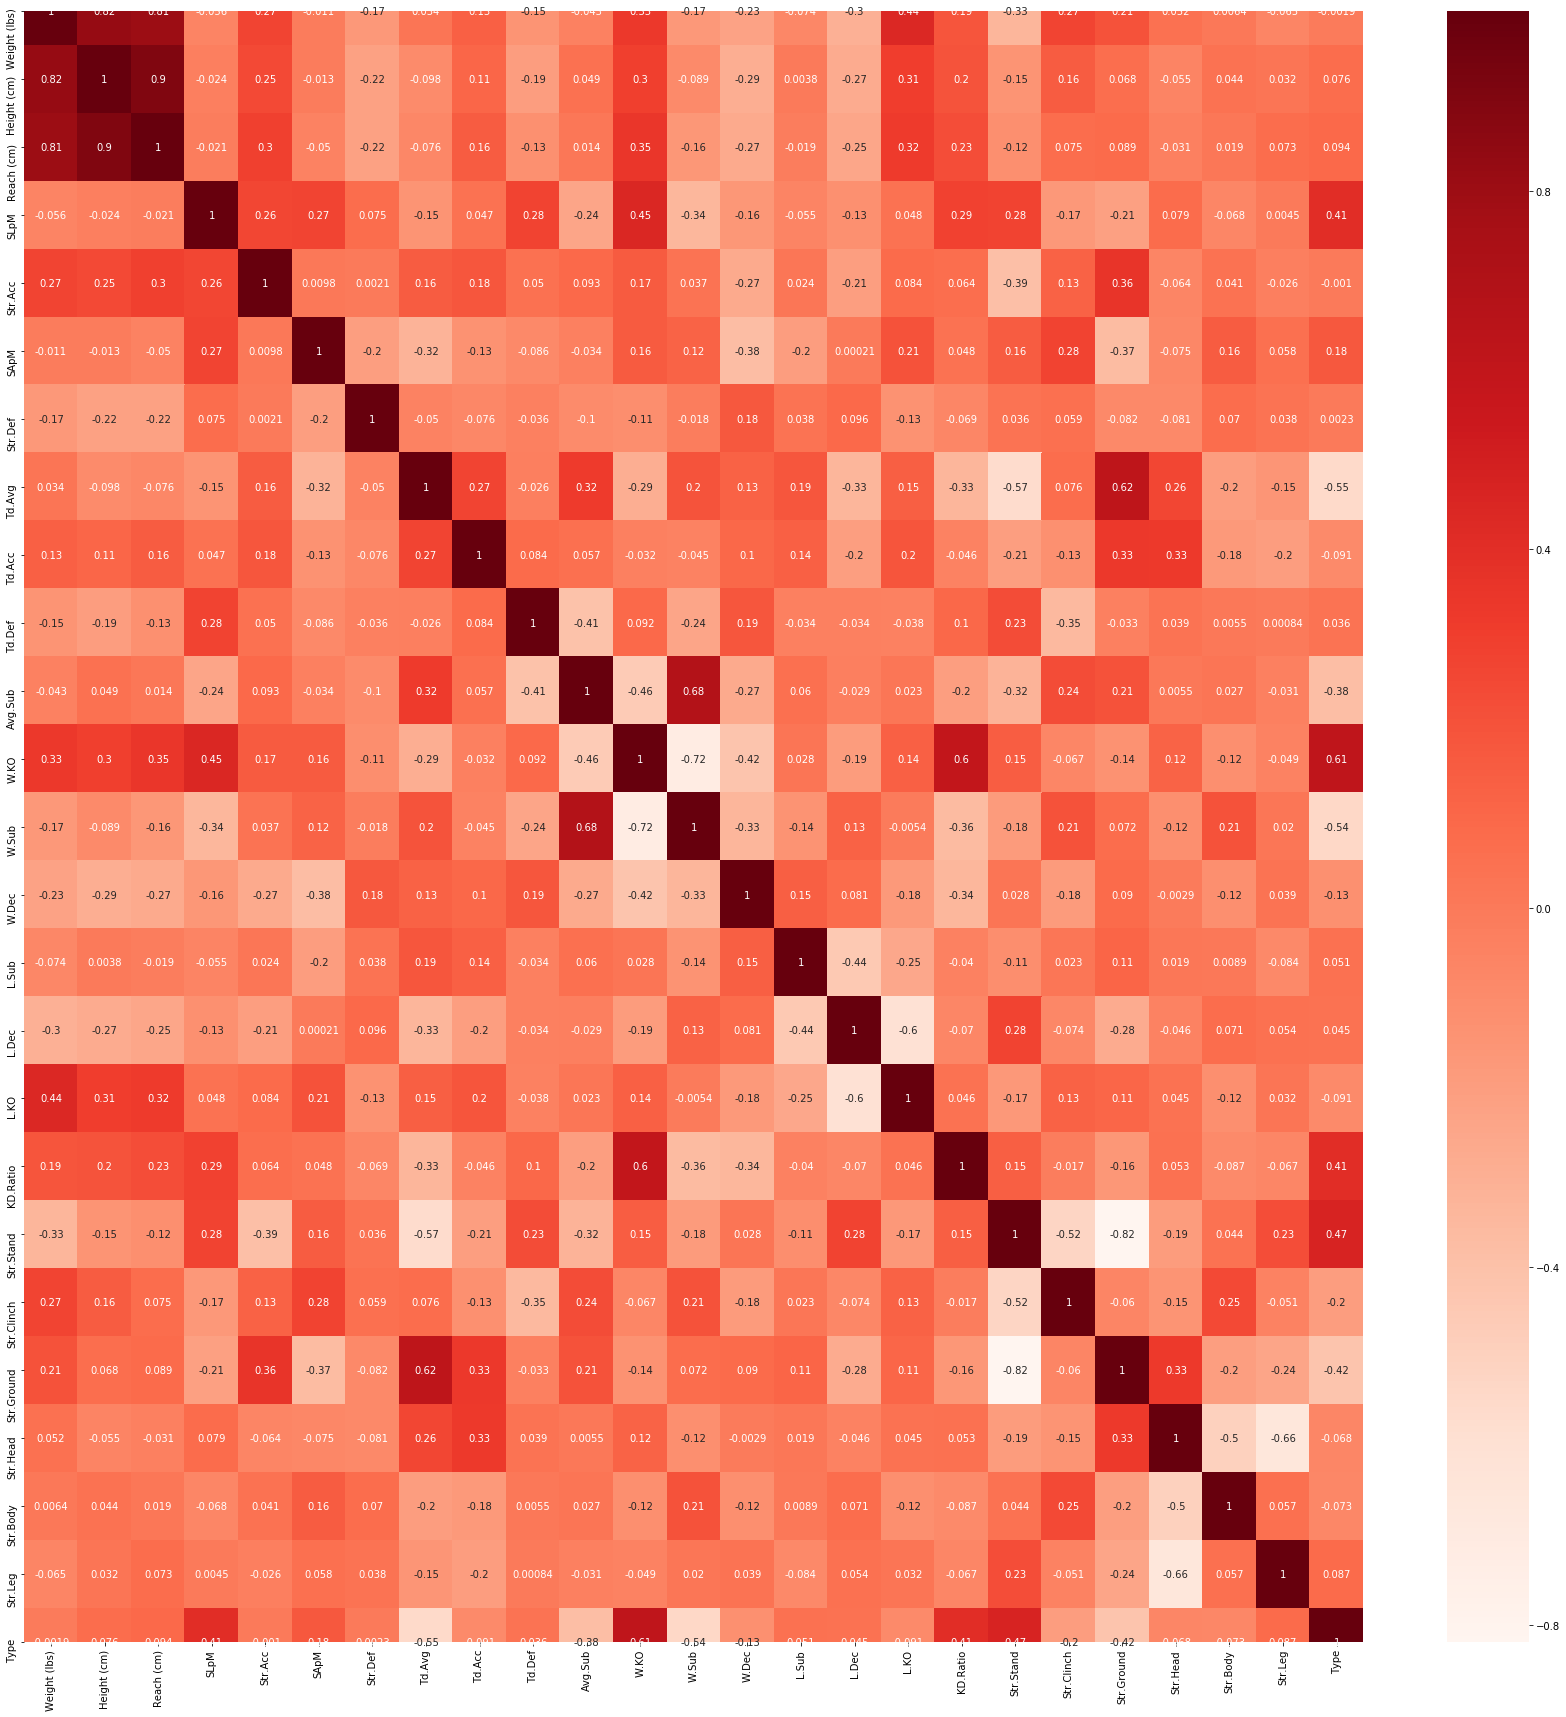

In [6]:
plt.figure(figsize=(30,30))
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The most impactful features on Type were extracted.

In [7]:
#Correlation with output variable
cor_target = cor["Type"]
#Selecting highly correlated features
#new_features=cor_target.index.values.tolist() # All features
#new_features=cor_target[cor_target>0.0].index.values.tolist() # All features with correlation greater than 0.0 
#new_features=cor_target[cor_target>0.1].index.values.tolist() #All features with correlation greater than 0.1
#new_features=cor_target[cor_target>0.2].index.values.tolist() #All features with correlation greater than 0.2
#new_features=cor_target[cor_target>0.3].index.values.tolist() #All features with correlation greater than 0.3
new_features=cor_target[cor_target>0.4].index.values.tolist() #All features with correlation greater than 0.4 
#new_features=cor_target[cor_target>0.45].index.values.tolist() #All features with correlation greater than 0.45
print(new_features[0:len(new_features)-1])

['SLpM', 'W.KO', 'KD.Ratio', 'Str.Stand']


The method asarray from numpy is used to convert the input into an array.

In [8]:
ufc_data = np.asarray(df[new_features[0:len(new_features)-1]])
ufc_data

array([[3.65, 0.51, 0.9 , 0.5 ],
       [4.47, 0.78, 0.88, 0.84],
       [4.29, 0.31, 0.2 , 0.4 ],
       [3.83, 0.45, 0.18, 0.5 ],
       [4.3 , 0.43, 0.22, 0.65],
       [3.83, 0.31, 0.39, 0.58],
       [6.78, 0.48, 0.42, 0.83],
       [4.33, 0.44, 0.43, 0.7 ],
       [3.06, 0.65, 1.06, 0.66],
       [2.46, 0.5 , 0.63, 0.55],
       [3.1 , 0.26, 0.  , 0.3 ],
       [4.59, 0.16, 0.09, 0.76],
       [2.41, 0.59, 0.76, 0.72],
       [2.74, 0.44, 0.31, 0.61],
       [5.43, 0.5 , 0.31, 0.71],
       [3.6 , 0.27, 0.1 , 0.67],
       [4.16, 0.44, 0.31, 0.78],
       [3.53, 0.36, 0.06, 0.82],
       [3.53, 0.6 , 0.5 , 0.15],
       [3.06, 0.62, 1.19, 0.75],
       [3.85, 0.71, 0.48, 0.67],
       [2.64, 0.37, 0.88, 0.48],
       [3.67, 0.5 , 0.43, 0.73],
       [2.13, 0.42, 0.21, 0.58],
       [2.22, 0.22, 0.  , 0.53],
       [4.76, 0.71, 0.94, 0.84],
       [5.59, 0.52, 0.8 , 0.72],
       [3.51, 0.81, 1.01, 0.66],
       [4.35, 0.28, 0.9 , 0.82],
       [3.09, 0.71, 0.71, 0.71],
       [3.

### Pre-processing Stage


Data is preprocessed via a Robust Scaler and X values are assigned.

In [9]:
robust = preprocessing.RobustScaler()
X = robust.fit_transform(ufc_data)
X.mean(axis=0)

array([ 0.14927114,  0.03131411,  0.25797503, -0.09760426])

The y or target values are assigned.

In [10]:
y = df["Type"]
y

0       Striker
1       Striker
2      Grappler
3      Grappler
4           MMA
         ...   
142         MMA
143    Grappler
144         MMA
145         MMA
146    Grappler
Name: Type, Length: 147, dtype: object

### Splitting the data

Data is split into train and test sets via train test split method

In [11]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [12]:
print("%r, %r" % (X_trainset.shape, y_trainset.shape)) 

(117, 4), (117,)


In [13]:
print("%r, %r" % (X_testset.shape, y_testset.shape))

(30, 4), (30,)


### Decision Tree Implementation

Decision Tree is implemented and parameters are assigned.

In [14]:
ufcTree = DecisionTreeClassifier(criterion='entropy',  max_depth=3) #Creates an instance of the DecisionTree. Specify criterion entropy so we can see the information gain of each node.
ufcTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Training data is fit to Decision Tree algorithm.

In [15]:
ufcTree=ufcTree.fit(X_trainset,y_trainset)

 Predictions are made on the test dataset

In [16]:
predTree = ufcTree.predict(X_testset)

In [17]:
print (y_testset[0:10])
print (predTree[0:10])

25      Striker
6       Striker
3      Grappler
40     Grappler
41      Striker
68      Striker
76     Grappler
15     Grappler
141         MMA
108     Striker
Name: Type, dtype: object
['Striker' 'Striker' 'MMA' 'Grappler' 'Striker' 'MMA' 'Grappler' 'MMA'
 'MMA' 'Striker']


### Evaluation Metrics

Model accuracy is determined via Jaccard Index and Classification report that contains Precision, Recall and F1 scores.

In [18]:
#Test accuracy with Jaccard Score
print("DT's Jaccard Similarity Score: ", metrics.jaccard_similarity_score(y_testset, predTree))

DT's Jaccard Similarity Score:  0.7666666666666667


/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [19]:
from sklearn.metrics import classification_report, confusion_matrix #Confusion matrix is imported
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[2,1,0]))
    
    # Compute confusion matrix without normalization
    cnf_matrix = confusion_matrix(y_test, yhat)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Striker', 'MMA','Grappler'],normalize= False,  title='Confusion matrix')

In [20]:
print (classification_report(y_testset, predTree)) #builds classification report

              precision    recall  f1-score   support

    Grappler       1.00      0.73      0.84        11
         MMA       0.50      0.71      0.59         7
     Striker       0.83      0.83      0.83        12

    accuracy                           0.77        30
   macro avg       0.78      0.76      0.75        30
weighted avg       0.82      0.77      0.78        30



Decision Tree model is built below.

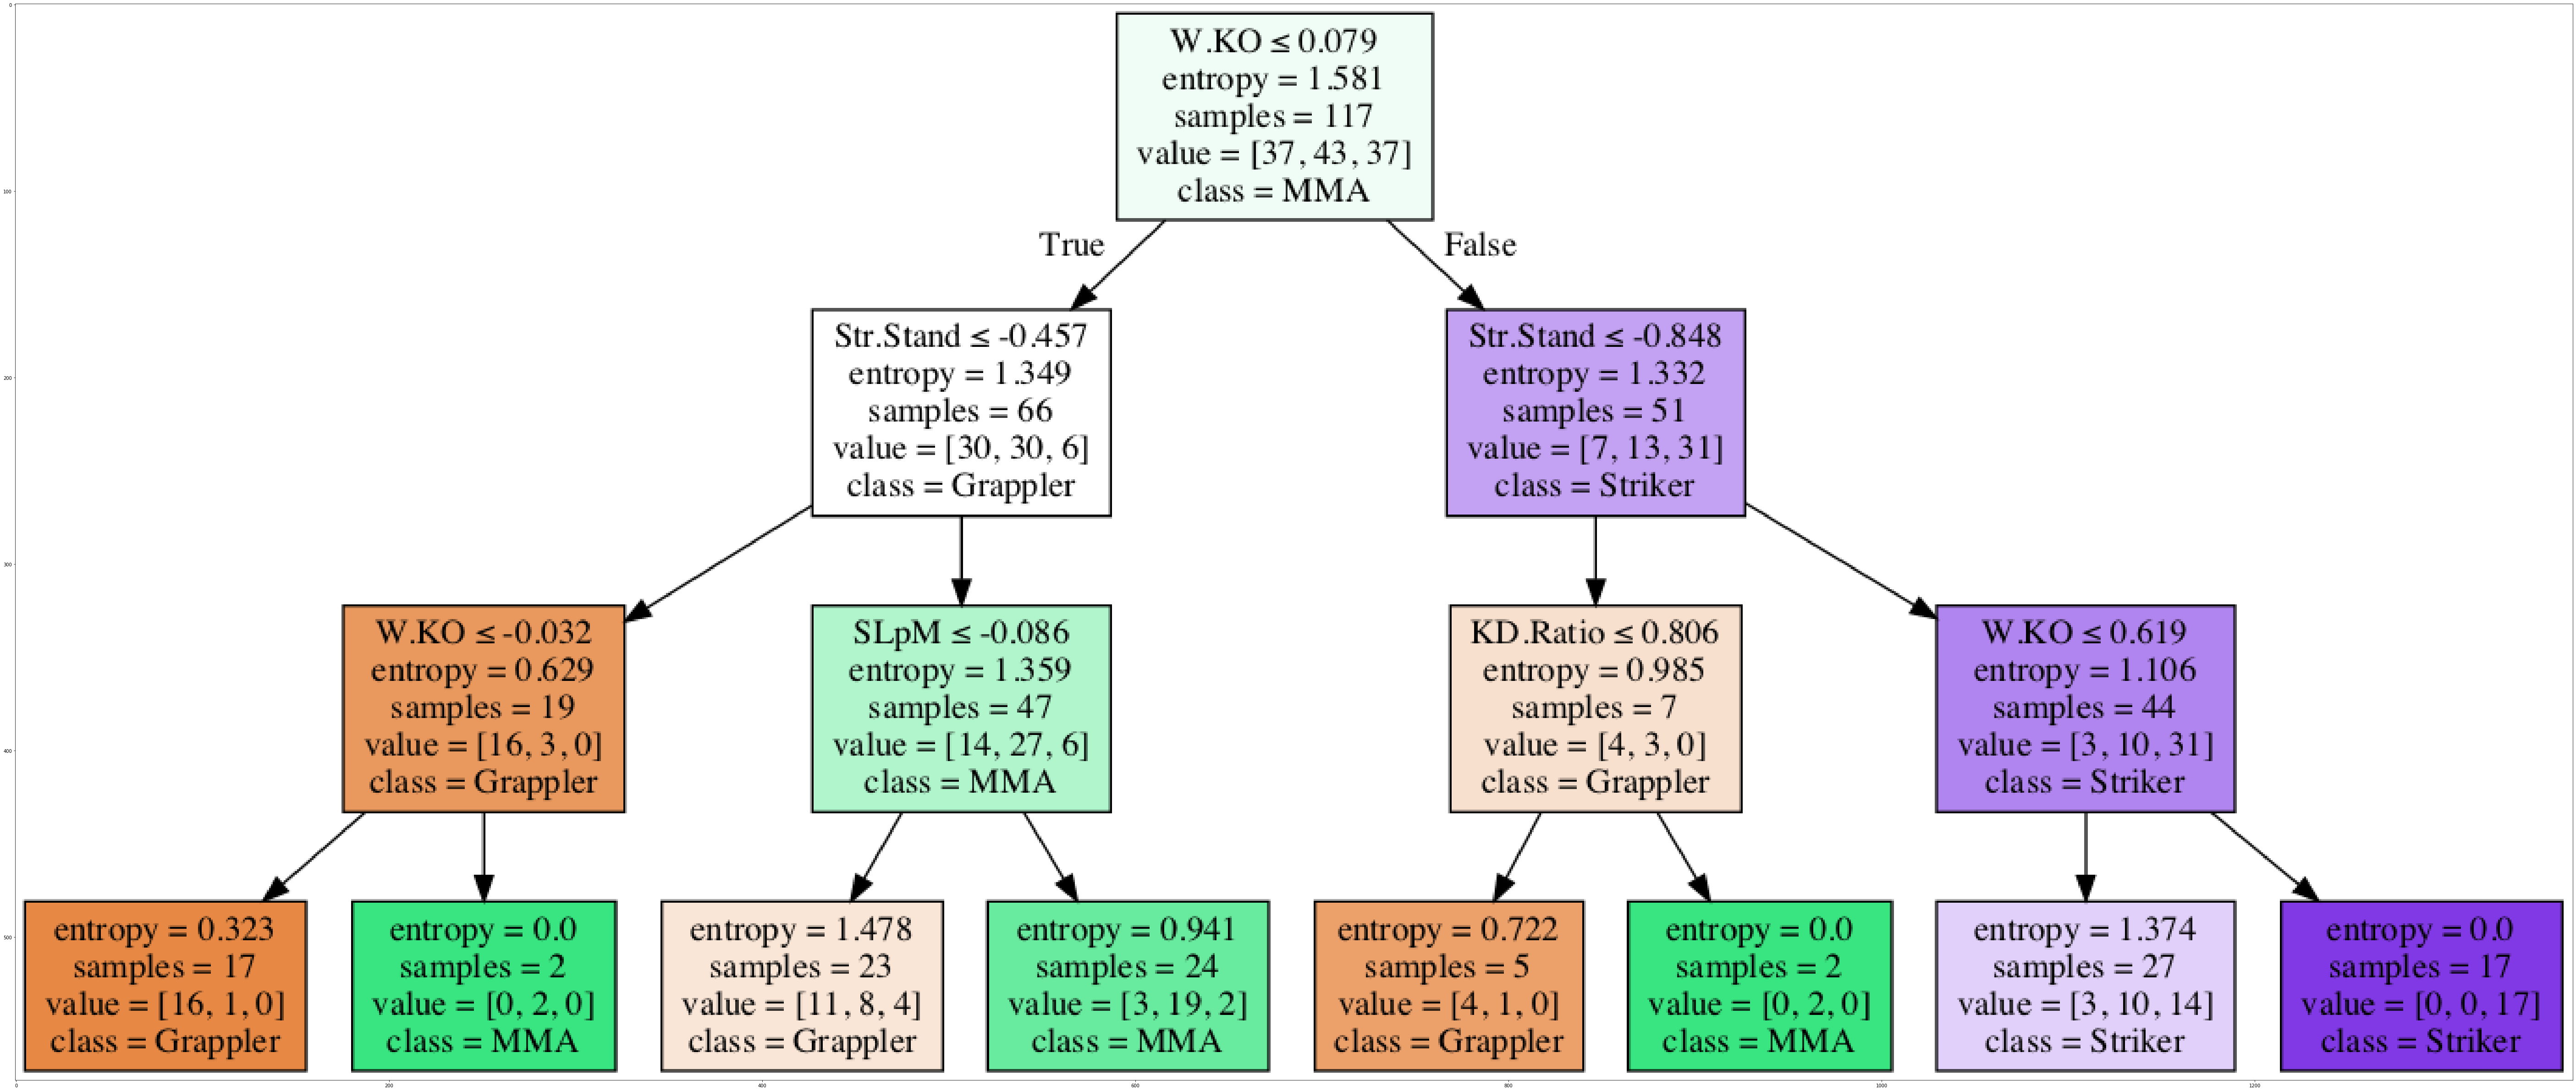

In [21]:
dot_data = StringIO() #plots decision tree 
filename = "ufctree.png"

featureNames = new_features[0:len(new_features)-1]
targetNames = df['Type'].unique().tolist()
out=tree.export_graphviz(ufcTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')